## **PHASE 1: DATA LOADING & EXPLORATION (30 minutes)**

### **Requirements:**

**1.1 Load the Dataset**
- Load Excel file using pandas
- Skip first row (header is in row 2)
- Remove first column (ID column)

**1.2 Initial Exploration**
- Display first 5 rows
- Display last 5 rows
- Show dataset shape (rows, columns)
- Display all column names
- Show data types of each column

**1.3 Statistical Summary**
- Get summary statistics for all numerical columns
- Show count, mean, std, min, 25%, 50%, 75%, max

**1.4 Missing Values Check**
- Check for missing values in each column
- Display count of missing values per column
- Calculate percentage of missing values

**1.5 Target Variable Analysis**
- Count how many defaults vs non-defaults
- Calculate default rate (percentage)
- Create a bar chart showing distribution

**Deliverable:** Written summary answering:
- How many customers are in the dataset?
- How many features are available?
- What's the default rate?
- Are there any missing values?
- Is the dataset balanced or imbalanced?

---

In [27]:
# **1.1 Load the Dataset**
# - Load Excel file using pandas
# - Skip first row (header is in row 2)
# - Remove first column (ID column)

# %pip install --upgrade pip
# %pip install xlrd
import pandas as pd
import numpy as np

In [28]:
df=pd.read_excel('../data/default of credit card clients.xls')
df.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [29]:
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [30]:
# Using pandas .iloc (the recommended way for DataFrames)
original_data = df.iloc[1:,1:].copy()
original_data.head(3)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [31]:
# We need to manually set the column names from the first row of the original data
original_data.columns = df.iloc[0, 1:].values
original_data.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [32]:
# 1.2 Initial Exploration
#
# Display first 5 rows
# Display last 5 rows
# Show dataset shape (rows, columns)
# Display all column names
# Show data types of each column

print(original_data.shape)
print(original_data.columns)
print(original_data.info())


(30000, 24)
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                     

In [33]:
# 1.3 Statistical Summary
#
# Get summary statistics for all numerical columns
# Show count, mean, std, min, 25%, 50%, 75%, max
original_data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [34]:
# 1.4 Missing Values Check
#
# Check for missing values in each column
# Display count of missing values per column


missing_counts = original_data.isnull().sum()
print("Count of missing values per column:")
print(missing_counts)

# Calculate percentage of missing values
total_value_count = original_data.value_counts().sum()
print(total_value_count)

percent_of_missing=missing_counts.sum()/total_value_count*100
print("Percentage of misisng values:")
print(percent_of_missing)


Count of missing values per column:
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64
30000
Percentage of misisng values:
0.0


In [35]:
# **1.5 Target Variable Analysis**
# - Count how many defaults vs non-defaults
# - Calculate default rate (percentage)
# - Create a bar chart showing distribution


### **1.5 Target Variable Analysis**


In [36]:
# The target column name is 'default payment next month'
target_col = 'default payment next month'

# Use value_counts() to get the counts of defaults (1) and non-defaults (0)
value_counts = original_data[target_col].value_counts()

print("Distribution of Target Variable:")
print(value_counts)

# Calculate the default rate
default_rate = (value_counts[1] / len(original_data)) * 100

print(f"\nTotal customers: {len(original_data)}")
print(f"Default Rate: {default_rate:.2f}%")

Distribution of Target Variable:
default payment next month
0    23364
1     6636
Name: count, dtype: int64

Total customers: 30000
Default Rate: 22.12%


<Axes: xlabel='default payment next month'>

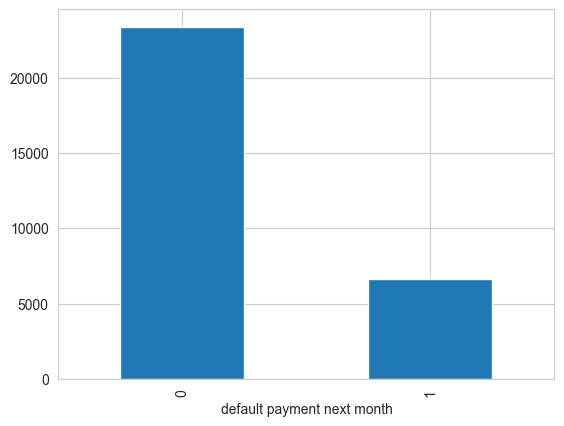

In [37]:
# - Create a bar chart showing distribution

from matplotlib import pyplot as plt
# Option 1: Using pyplot explicitly
# plt.bar(value_counts.index, value_counts.values)

# Option 2: Using the pandas integration (often easier)
value_counts.plot(kind='bar')

**Deliverable:** Written summary answering:
- How many customers are in the dataset?
Ans : 30000 - 1
- How many features are available?
Ans : 24 - 1 -1
- What's the default rate?
Ans : 22%
- Are there any missing values?
Ans : No
- Is the dataset balanced or imbalanced?
Ans : Yes
